In [1]:
import matplotlib.pyplot as plt, seaborn as sns, pandas as pd
%matplotlib inline
plt.style.use('default')

Text(0, 0.5, 'Selling Value')

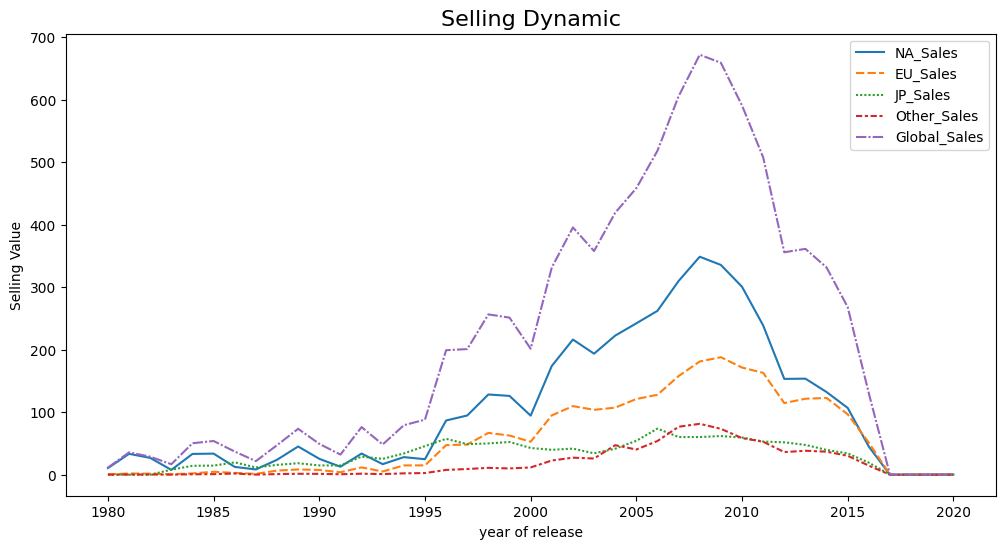

In [2]:
vid = pd.read_csv('Data/video/Video_Games_Sales_as_at_22_Dec_2016.csv', sep=',')
dbr = vid[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']].groupby('Year_of_Release').sum()
fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=dbr)
lineplot.set_title('Selling Dynamic', fontsize=16)
lineplot.set_xlabel('year of release')
lineplot.set_ylabel('Selling Value')

In [3]:
covdat = pd.read_csv('Data/visual/covid_data.csv')
vacs = pd.read_csv('Data/visual/country_vaccinations.csv')
vacs = vacs[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
    ]
covdat = covdat.groupby(['date', 'country'], as_index=False)[['confirmed', 'deaths', 'recovered']].sum()

covdat['date'] = pd.to_datetime(covdat['date'])

covdat['active'] = covdat['confirmed'] - covdat['deaths'] - covdat['recovered']
covdat = covdat.sort_values(by=['country', 'date'])

covdat['dailyConfirmed'] = covdat.groupby('country')['confirmed'].diff()
covdat['dailyDeaths'] = covdat.groupby('country')['deaths'].diff()
covdat['dailyRecs'] = covdat.groupby('country')['recovered'].diff()

vacs['date'] = pd.to_datetime(vacs['date'])
vacs

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [4]:
cdf = covdat.merge(vacs, on=['date', 'country'], how='left')
cdf['death_rate'] = cdf['deaths'] / cdf['confirmed'] * 100
cdf['recoverRate'] = cdf['recovered'] / cdf['confirmed'] * 100


round(cdf[cdf['country'] == 'United States']['death_rate'].max(), 2)
round(cdf[cdf['country'] == 'Russia']['recoverRate'].mean(), 2)
cdf

,date,country,confirmed,deaths,recovered,active,dailyConfirmed,dailyDeaths,dailyRecs,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recoverRate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


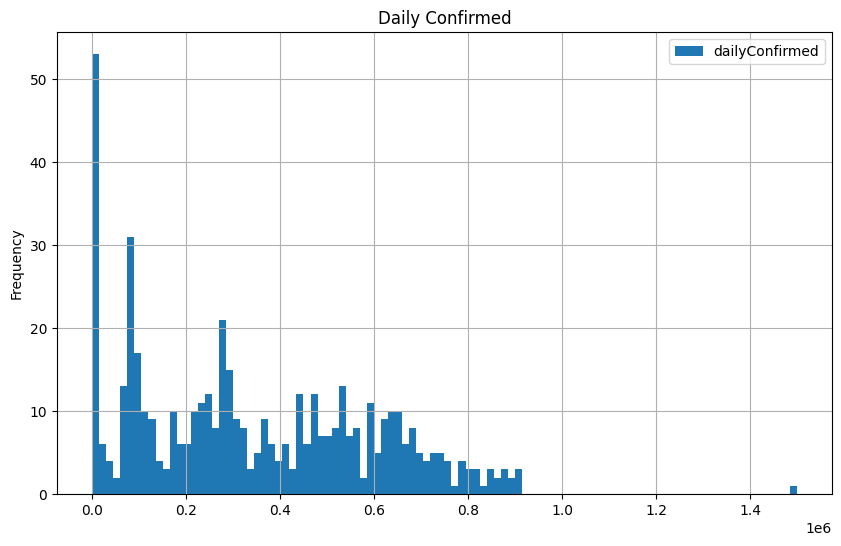

In [5]:
cases = cdf.groupby('date')['dailyConfirmed'].sum()
cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Daily Confirmed',
    grid=True,
    bins=100,
    legend=True
);

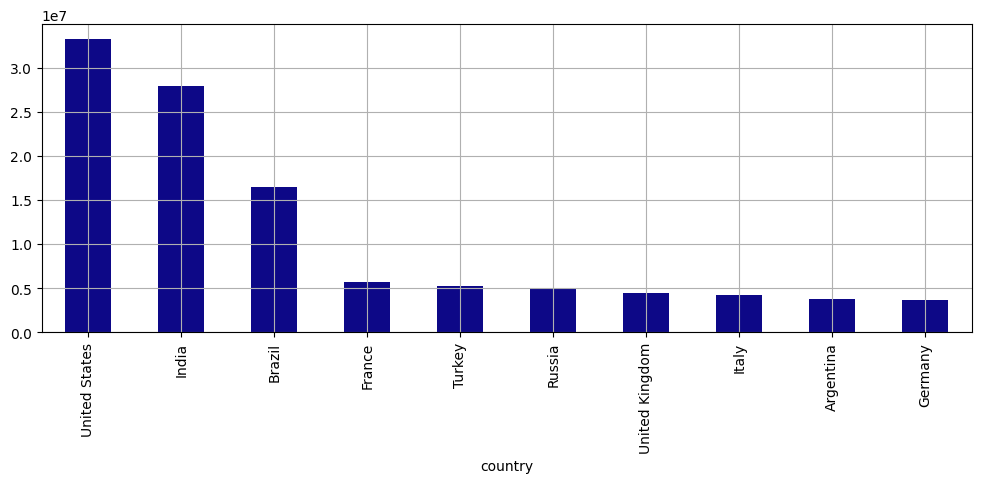

In [6]:
countcas = cdf.groupby(['country'])['confirmed'].last()
countcas = countcas.nlargest(10)
countcas.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

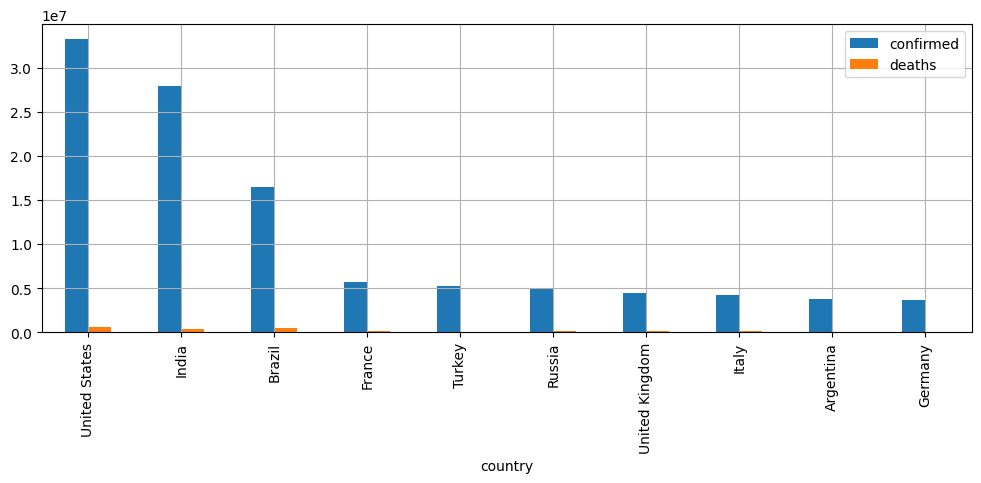

In [7]:
countcas = cdf.groupby(['country'])[['confirmed', 'deaths']].last()
countcas = countcas.nlargest(10, columns=['confirmed'])
countcas.plot(kind='bar', grid=True, figsize=(12, 4), );

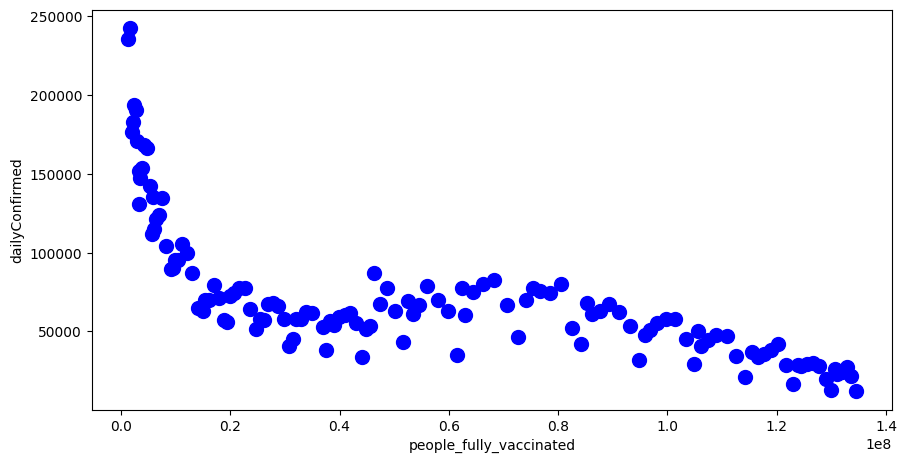

In [8]:
usdc = cdf[cdf['country'] == 'United States']
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylabel('dailyConfirmed')
axes.set_xlabel('people_fully_vaccinated')
axes.scatter(
    x=usdc['people_fully_vaccinated'],
    y=usdc['dailyConfirmed'],
    s=100,
    marker='o',
    color='blue'
);

In [9]:
nnancom = cdf.dropna(subset=['vaccines'])
comlast = nnancom.groupby(['country'])['vaccines'].last()
comlast = comlast.apply(lambda x: x.replace(' ', '').split(','))
vacDict = {}
for vaclist in comlast:
    for vaccine in vaclist:
        if vaccine not in vacDict:
            vacDict[vaccine] = 1
        else:
            vacDict[vaccine] +=1
vaccines = pd.Series(vacDict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
vaccines

Oxford/AstraZeneca    149
Pfizer/BioNTech       102
Sinopharm/Beijing      66
Moderna                58
SputnikV               48
Johnson&Johnson        45
Sinovac                39
other                  24
dtype: int64

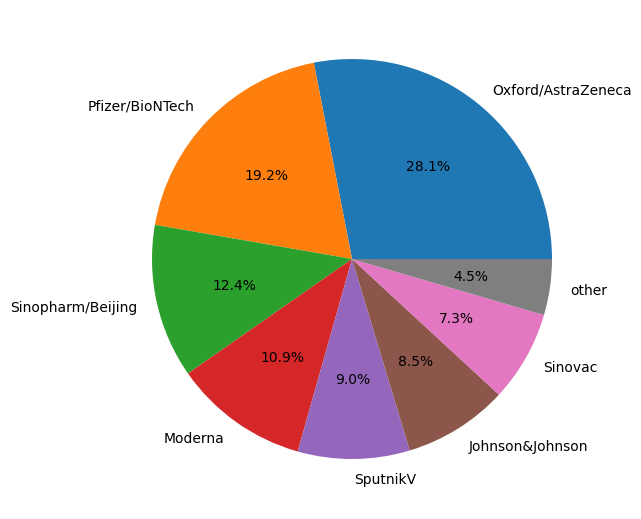

In [10]:
vaccom = cdf['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct= '%.1f%%'
);

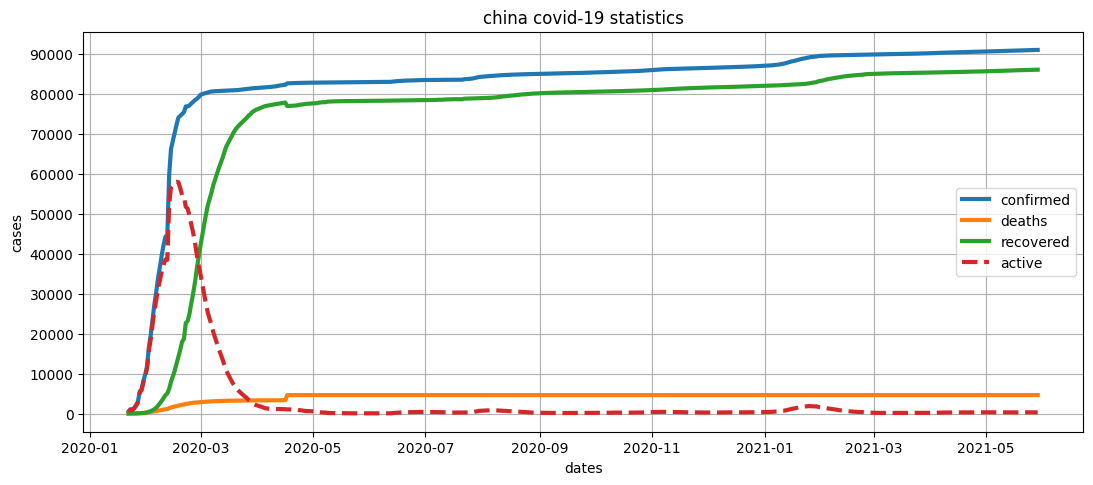

In [18]:
china = cdf[cdf['country'] == 'China']
chinag = china.groupby(by=['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()
chinag

fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(chinag['confirmed'], label='confirmed', lw=3)
axes.plot(chinag['deaths'], label='deaths', lw=3)
axes.plot(chinag['recovered'], label='recovered', lw=3)
axes.plot(chinag['active'], label='active', lw=3, linestyle='dashed')

axes.set_title('china covid-19 statistics')
axes.set_xlabel('dates')
axes.set_ylabel('cases')
axes.set_yticks(range(0, 100000, 10000))
axes.grid()
axes.legend();